In [0]:
import numpy as np
import pandas as pd
from jinja2 import Template
from IPython.display import HTML

kaggle upload

In [2]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"soumyasinha29","key":"f0a42ca0b4e9ba6c48009779f3231127"}'}

In [3]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

-rw-r--r-- 1 root root 69 Mar 27 21:16 kaggle.json


In [0]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [0]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [21]:
# List available datasets.
!kaggle datasets download -d imdevskp/covid19-corona-virus-india-dataset

covid19-corona-virus-india-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
!ls

In [23]:
!unzip covid19-corona-virus-india-dataset.zip

Archive:  covid19-corona-virus-india-dataset.zip
replace complete.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: complete.csv            
replace web_scraping.ipynb? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: web_scraping.ipynb      


In [24]:
!ls

complete.csv		      covid19-corona-virus-india-dataset.zip
complete_data_new_format.csv  kaggle.json
corona-virus-report.zip       sample_data
covid_19_clean_complete.csv   web_scraping.ipynb


In [0]:
from matplotlib import pyplot as plt
import os, random, cv2
%matplotlib inline

In [31]:
df = pd.read_csv("complete.csv")
df.head()

,Date,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured/Discharged/Migrated,Latitude,Longitude,Death
0,2020-01-30,Kerala,1,0,0,10.8505,76.2711,0
1,2020-01-31,Kerala,1,0,0,10.8505,76.2711,0
2,2020-02-01,Kerala,2,0,0,10.8505,76.2711,0
3,2020-02-02,Kerala,3,0,0,10.8505,76.2711,0
4,2020-02-03,Kerala,3,0,0,10.8505,76.2711,0


Data Visualization

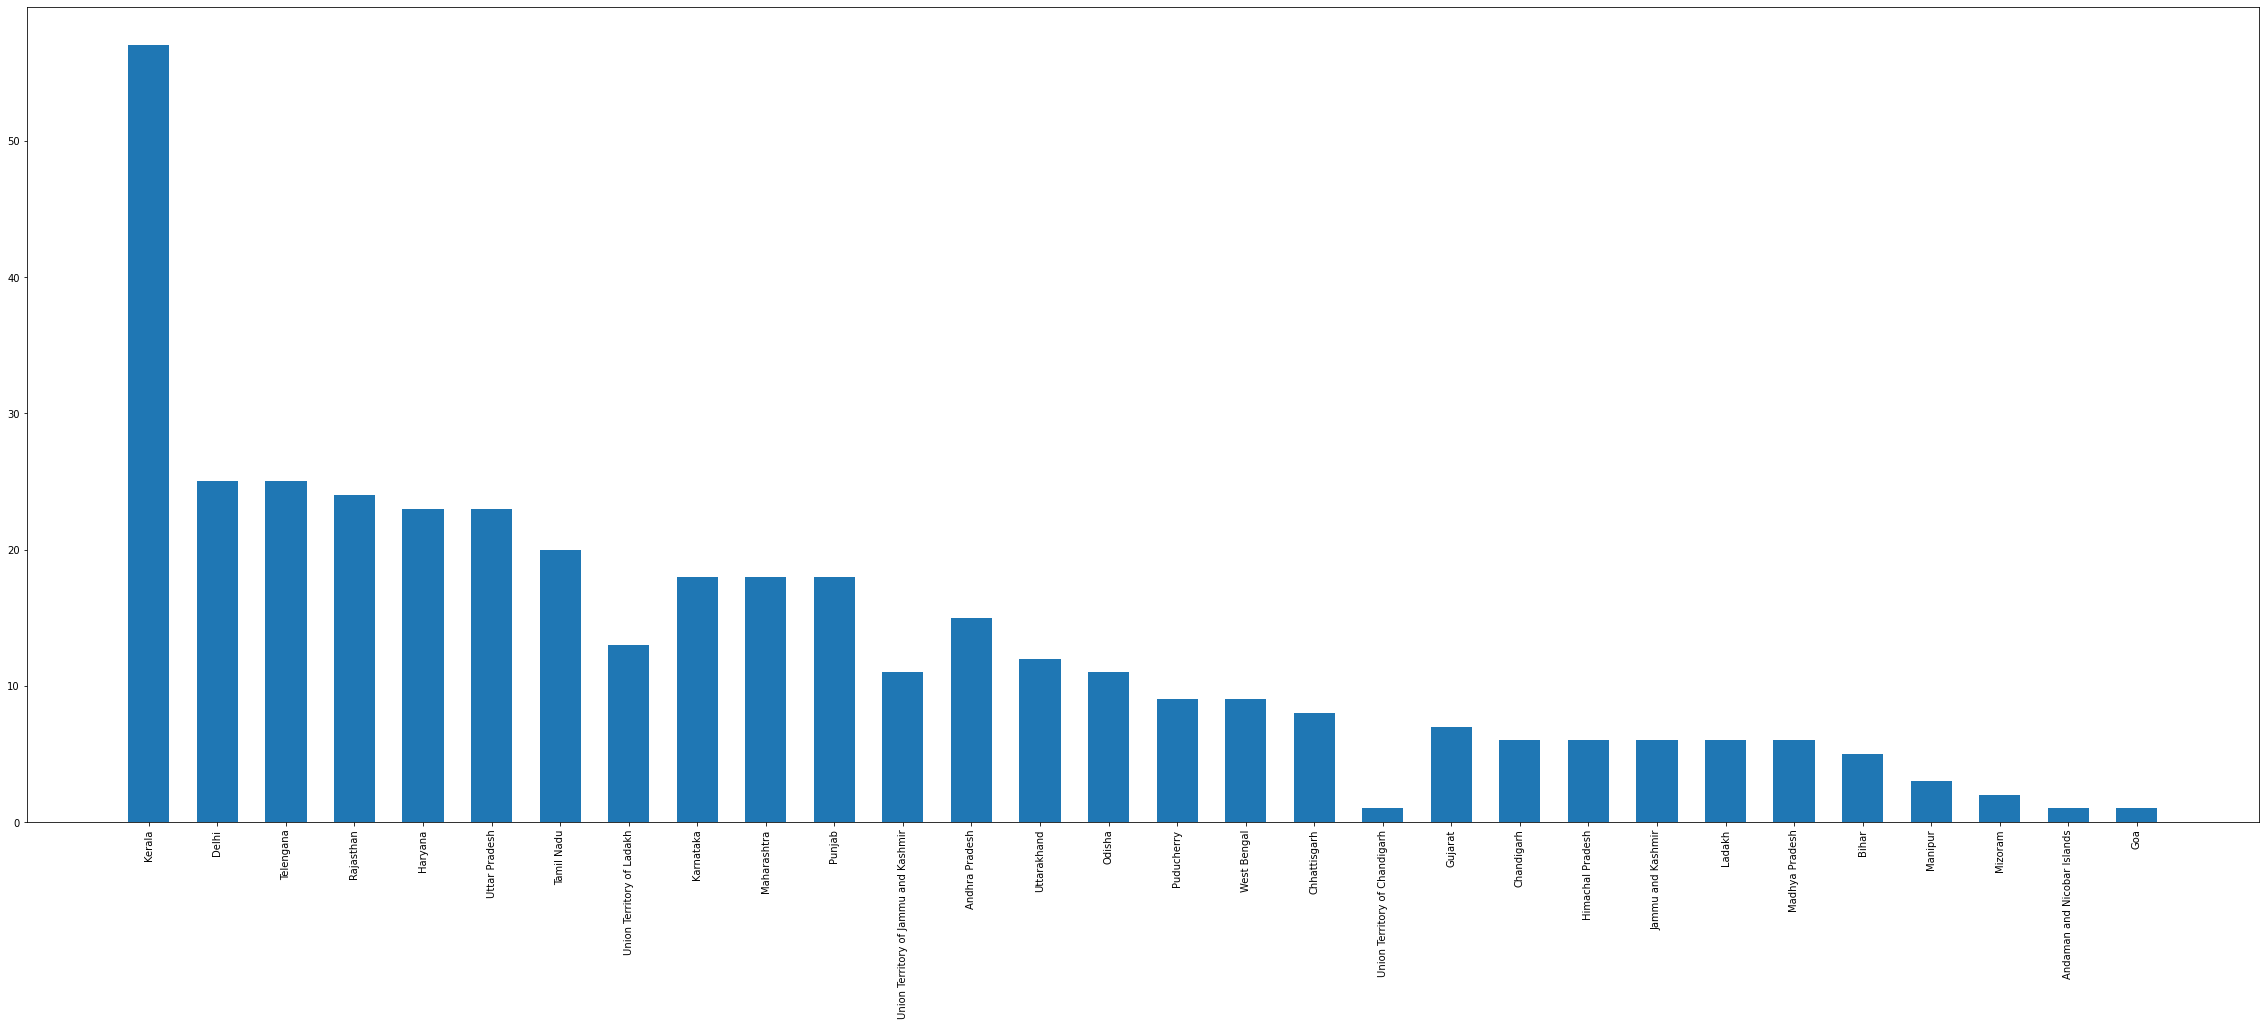

In [33]:
# Let's encode the labels
labels_map = {}
inv_labels_map = {}
count = 0
for label in df['Name of State / UT']:
  if(label in labels_map):
    continue
  labels_map[label] = count
  inv_labels_map[count] = label
  count = count + 1
# print("Label Map: ", labels_map)
# print("No. of Labels are: ", count)
# Let's check the distribution of the classes we have
labels_count = {}
for label in df['Name of State / UT']:
  if(label in labels_count):
    labels_count[label] = labels_count[label] + 1
  else:
    labels_count[label] = 0
# print(labels_count)
plt.figure(figsize=(40,15))
plt.bar(list(labels_count.keys()), list(labels_count.values()),width=0.6)
plt.xticks(rotation = 90)
plt.show()

In [92]:
df.sum()

Date                                          2020-01-302020-01-312020-02-012020-02-022020-0...
Name of State / UT                            KeralaKeralaKeralaKeralaKeralaKeralaKeralaKera...
Total Confirmed cases (Indian National)                                                    4549
Total Confirmed cases ( Foreign National )                                                  605
Cured/Discharged/Migrated                                                                   414
Latitude                                                                                9361.44
Longitude                                                                               32755.6
Death                                                                                        94
dtype: object

In [94]:
df.shape

(419, 8)

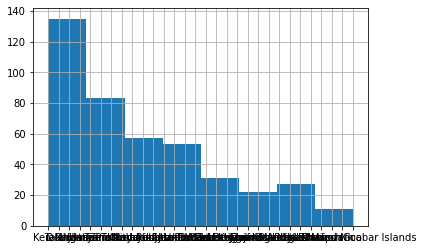

In [39]:
df['Name of State / UT'].hist(bins=8)

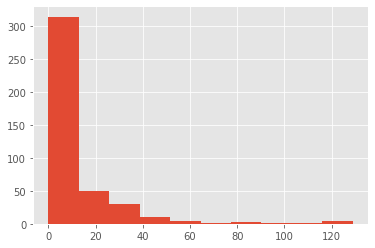

In [73]:
df['Total Confirmed cases (Indian National)'].hist(bins=10)

Text(0, 0.5, 'Death')

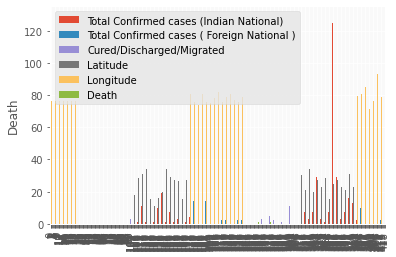

In [55]:
plt.style.use('ggplot')
df.plot(kind='bar')
plt.ylabel('Death')

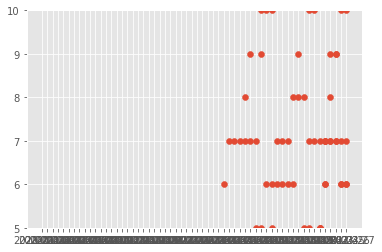

In [70]:
# Select two countries' worth of data.
a = df['Date']
b = df['Total Confirmed cases (Indian National)']
plt.ylim(5, 10)
#plt.grid(True)
plt.scatter(a, b)

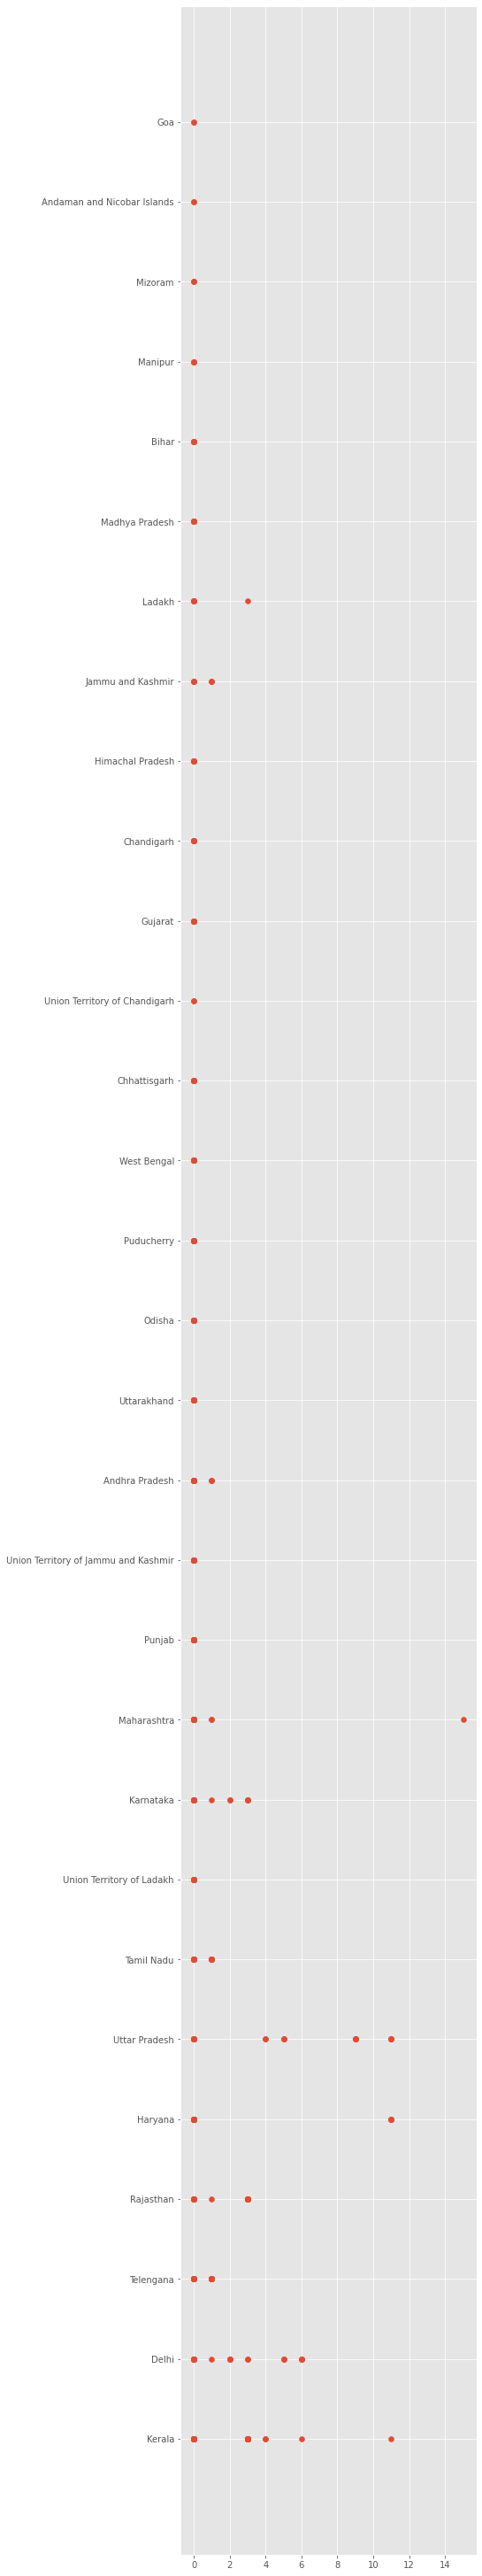

In [76]:
plt.scatter(df['Cured/Discharged/Migrated'], df['Name of State / UT']) 
ax = plt.gca()
ttl = ax.title
ttl.set_position([5, 1])
plt.subplots_adjust(top=20)
plt.subplots_adjust(bottom=10)

plt.draw()
plt.show() 
  

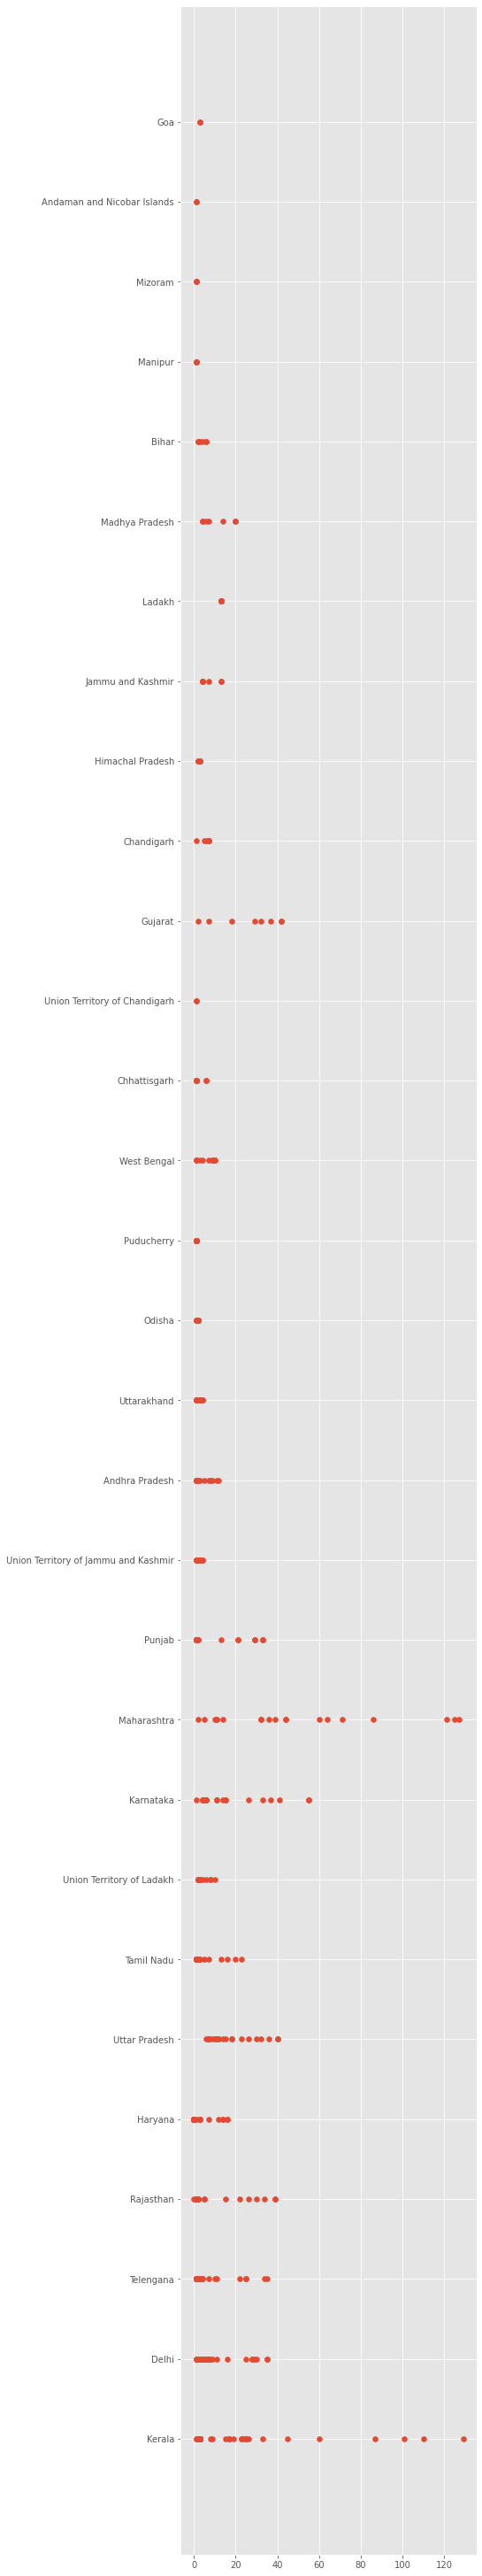

In [91]:
plt.scatter(df['Total Confirmed cases (Indian National)'], df['Name of State / UT']) 
ax = plt.gca()
ttl = ax.title
ttl.set_position([5, 1])
plt.subplots_adjust(top=20)
plt.subplots_adjust(bottom=10)
plt.draw()
plt.show() 
  

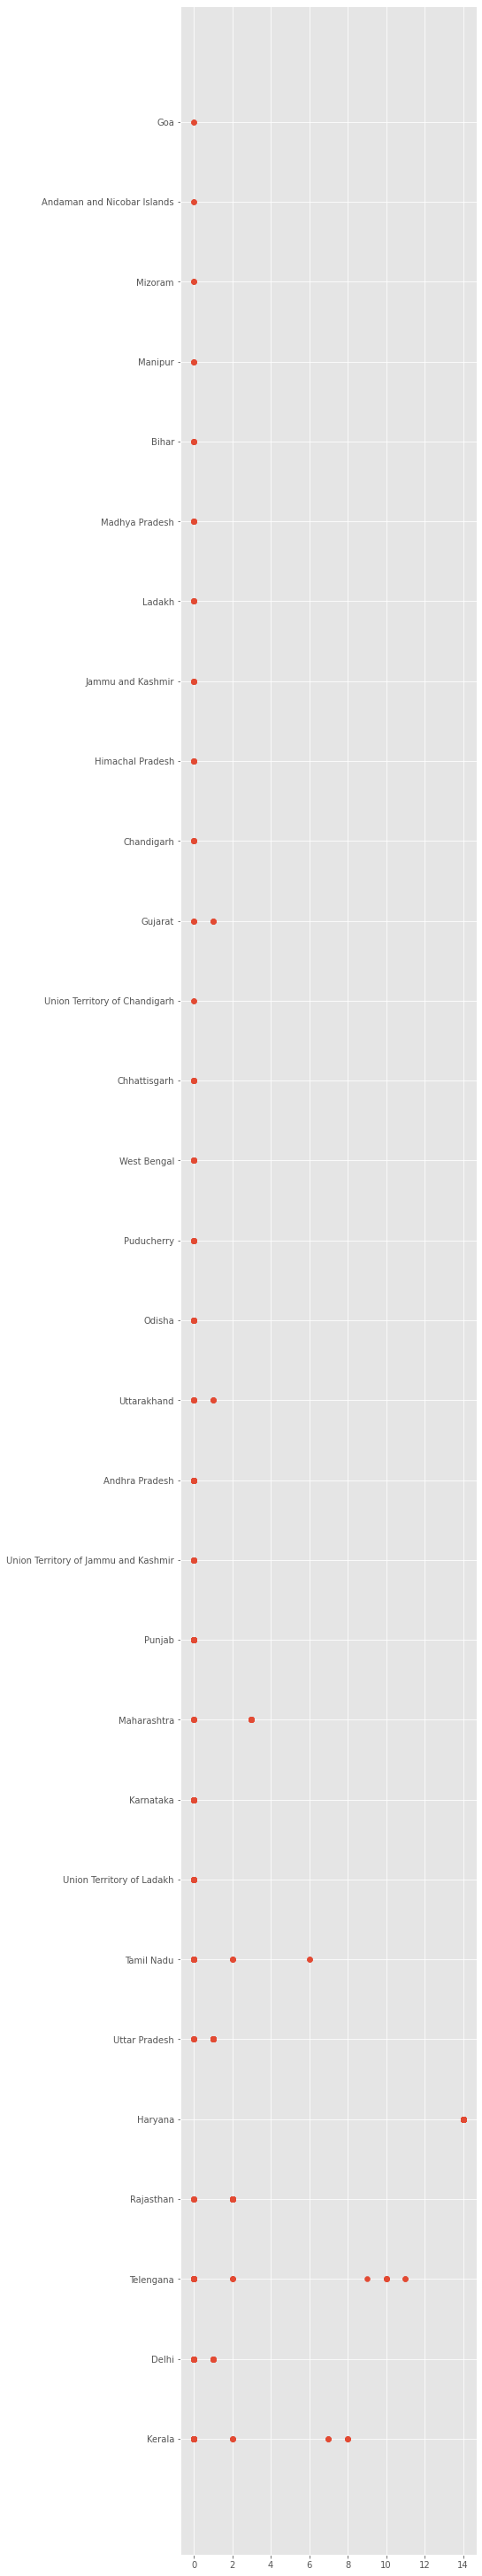

In [88]:
plt.scatter(df['Total Confirmed cases ( Foreign National )'], df['Name of State / UT']) 
ax = plt.gca()
ttl = ax.title
ttl.set_position([5, 1])
plt.subplots_adjust(top=20)
plt.subplots_adjust(bottom=10)

plt.draw()
plt.show() 
  

ERROR! Session/line number was not unique in database. History logging moved to new session 64


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

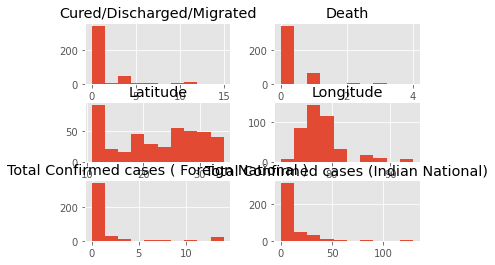

In [103]:
df.hist()
plt.show()